In [54]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle 
from pathlib import Path

In [55]:
project = pd.read_csv("E:/KULIAH/Data Sains Class/ecommerce_churn.csv")

In [56]:
project.shape

(1896, 20)

In [57]:
project.columns.values

array(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice',
       'CityTier', 'WarehouseToHome', 'PreferredPaymentMode', 'Gender',
       'HourSpendOnApp', 'DeviceRegistered', 'PreferedOrderCat',
       'SatisfactionScore', 'MaritalStatus', 'NumberOfAddress',
       'Complain', 'OrderIncreaseFromLastYear', 'CouponUsed',
       'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'], dtype=object)

In [58]:
project.isna().sum()

CustomerID                     0
Churn                          0
Tenure                       157
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome              152
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp               130
DeviceRegistered               0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderIncreaseFromLastYear     41
CouponUsed                    79
OrderCount                    59
DaySinceLastOrder             84
CashbackAmount                 0
dtype: int64

In [59]:
project.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,DeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderIncreaseFromLastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50027,0,8.0,Mobile Phone,3,6.0,E wallet,Male,3.0,3,Fashion,4,Divorced,2,0,13.0,1.0,1.0,6.0,172.95
1,50028,0,NaN,Phone,3,12.0,E wallet,Male,2.0,3,Laptop & Accessory,3,Divorced,3,1,20.0,0.0,4.0,5.0,123.06
2,50029,0,18.0,Phone,1,NaN,Debit Card,Male,2.0,3,Laptop & Accessory,4,Married,9,0,18.0,1.0,1.0,15.0,123.48
3,50030,0,5.0,Computer,3,14.0,E wallet,Female,2.0,3,Fashion,2,Single,2,0,14.0,2.0,3.0,7.0,189.98
4,50031,0,2.0,Computer,1,6.0,COD,Male,2.0,3,Laptop & Accessory,3,Divorced,2,0,13.0,0.0,1.0,9.0,143.19


In [60]:
project.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,DeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderIncreaseFromLastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,1896.000000,1896.000000,1739.000000,1896.000000,1744.000000,1766.000000,1896.000000,1896.000000,1896.000000,1896.000000,1855.000000,1817.000000,1837.000000,1812.000000,1896.000000
mean,51668.825949,0.500000,7.347901,1.719409,15.922018,2.682899,3.543776,3.275316,4.088080,0.385549,15.391914,1.470556,2.694066,3.786976,164.907252
std,1598.949360,0.500132,8.149302,0.936148,8.498368,0.679286,1.015023,1.269551,2.694888,0.486853,3.695976,1.862077,2.866878,3.540237,44.698011
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,50474.750000,0.000000,1.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,12.000000,0.000000,1.000000,1.000000,132.940000
50%,50948.500000,0.500000,4.000000,1.000000,14.000000,3.000000,3.000000,3.000000,3.000000,0.000000,14.000000,1.000000,2.000000,3.000000,150.870000
75%,52809.250000,1.000000,13.000000,3.000000,22.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,181.610000
max,55622.000000,1.000000,50.000000,3.000000,36.000000,4.000000,6.000000,5.000000,21.000000,1.000000,26.000000,16.000000,16.000000,46.000000,323.590000


In [61]:
project['Churn'].value_counts()

1    948
0    948
Name: Churn, dtype: int64

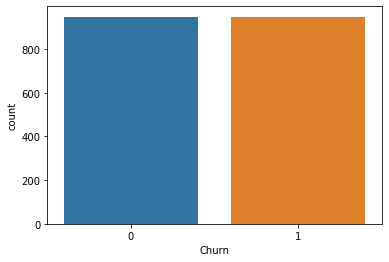

In [62]:
sns.countplot(project['Churn'])

In [65]:
numRetained = project[project.Churn == 'No'].shape[0]
numChurned = project[project.Churn == 'Yes'].shape[0]

# print the percentage of customers that stayed
print(numRetained/(numRetained + numChurned) * 100,'% of customers stayed in the company')
# print the percentage of customers that left
print(numChurned/(numRetained + numChurned) * 100, '% of customers left with the company')

ZeroDivisionError: division by zero

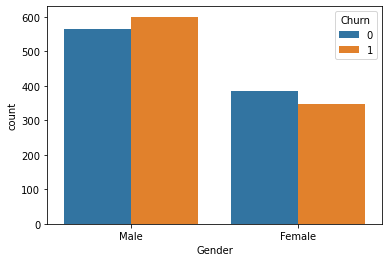

In [66]:
sns.countplot(x ='Gender', hue='Churn', data=project)

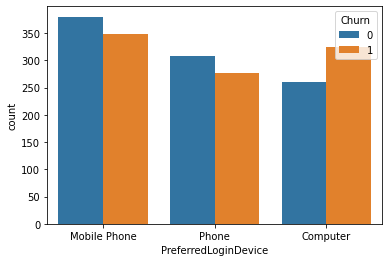

In [67]:
sns.countplot(x='PreferredLoginDevice', hue='Churn', data=project)

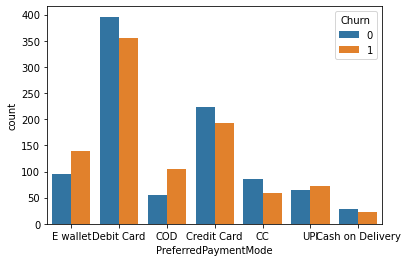

In [68]:
sns.countplot(x='PreferredPaymentMode', hue='Churn', data=project)

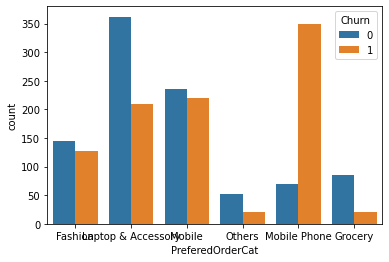

In [69]:
sns.countplot(x='PreferedOrderCat', hue='Churn', data=project)

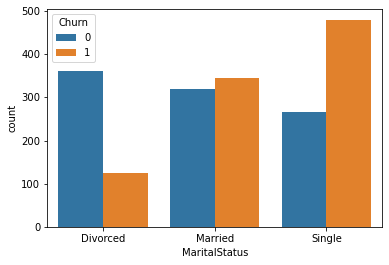

In [70]:
sns.countplot(x='MaritalStatus', hue='Churn', data=project)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A2C4BF970>,
      dtype=object)

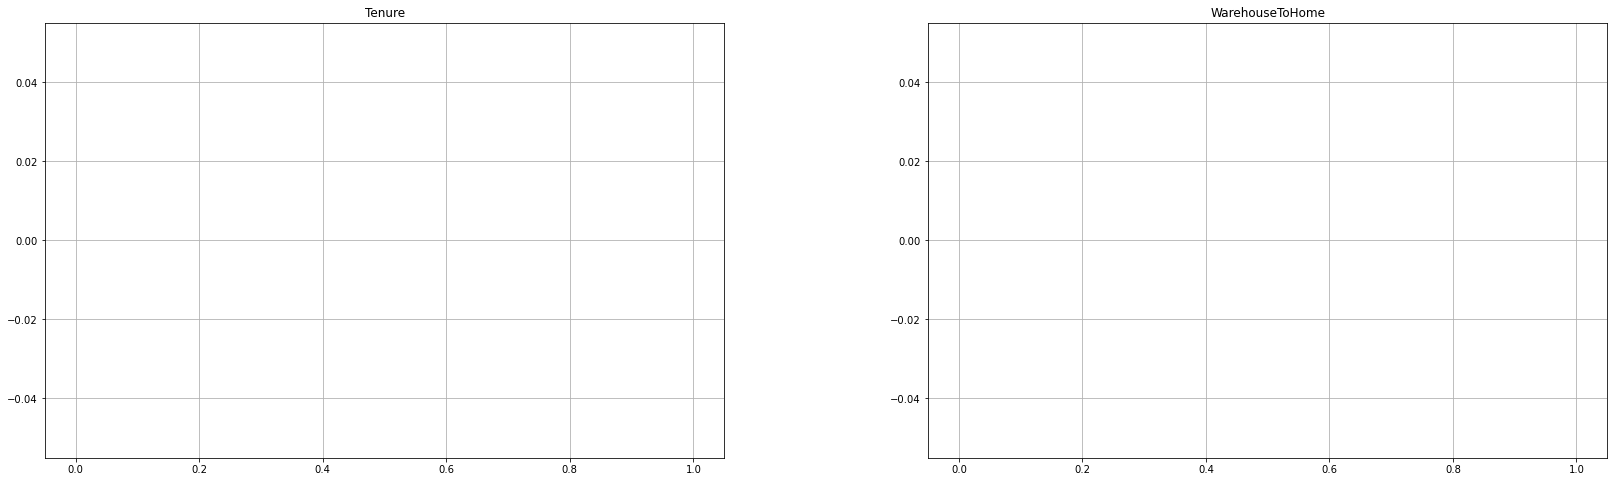

In [71]:
numericFeatures = ['Tenure', 'WarehouseToHome']
fig, ax = plt.subplots(1,2, figsize=(28, 8))
project[project.Churn == "No"][numericFeatures].hist(bins=20, color='blue', alpha=0.5, ax=ax)
project[project.Churn == "Yes"][numericFeatures].hist(bins=20, color='orange', alpha=0.5, ax=ax)

In [103]:
cleaned_df = project.drop(['Tenure','CustomerID','CashbackAmount','WarehouseToHome','HourSpendOnApp','OrderIncreaseFromLastYear','CouponUsed','OrderCount','DaySinceLastOrder'], axis=1)
print(cleaned_df.head())

   Churn PreferredLoginDevice  CityTier PreferredPaymentMode  Gender  \
0      0         Mobile Phone         3             E wallet    Male   
1      0                Phone         3             E wallet    Male   
2      0                Phone         1           Debit Card    Male   
3      0             Computer         3             E wallet  Female   
4      0             Computer         1                  COD    Male   

   DeviceRegistered    PreferedOrderCat  SatisfactionScore MaritalStatus  \
0                 3             Fashion                  4      Divorced   
1                 3  Laptop & Accessory                  3      Divorced   
2                 3  Laptop & Accessory                  4       Married   
3                 3             Fashion                  2        Single   
4                 3  Laptop & Accessory                  3      Divorced   

   NumberOfAddress  Complain  
0                2         0  
1                3         1  
2                

In [104]:
project.dropna(axis=0)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,DeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderIncreaseFromLastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50027,0,8.0,Mobile Phone,3,6.0,E wallet,Male,3.0,3,Fashion,4,Divorced,2,0,13.0,1.0,1.0,6.0,172.95
3,50030,0,5.0,Computer,3,14.0,E wallet,Female,2.0,3,Fashion,2,Single,2,0,14.0,2.0,3.0,7.0,189.98
4,50031,0,2.0,Computer,1,6.0,COD,Male,2.0,3,Laptop & Accessory,3,Divorced,2,0,13.0,0.0,1.0,9.0,143.19
5,50032,0,0.0,Mobile Phone,1,13.0,Credit Card,Male,2.0,4,Laptop & Accessory,3,Divorced,3,0,17.0,1.0,1.0,0.0,161.32
6,50033,0,30.0,Phone,1,15.0,CC,Female,3.0,4,Mobile,4,Divorced,5,1,20.0,1.0,1.0,0.0,133.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,55556,1,1.0,Computer,3,33.0,E wallet,Male,4.0,4,Laptop & Accessory,1,Married,3,1,12.0,1.0,2.0,9.0,181.17
1891,55599,1,1.0,Computer,3,16.0,E wallet,Male,3.0,4,Mobile Phone,5,Married,3,0,20.0,2.0,2.0,1.0,142.90
1892,55603,1,1.0,Mobile Phone,1,8.0,Credit Card,Male,3.0,4,Mobile Phone,1,Married,11,1,15.0,3.0,3.0,3.0,172.87
1893,55605,1,20.0,Phone,1,14.0,COD,Male,4.0,4,Mobile Phone,3,Married,10,0,12.0,7.0,10.0,9.0,148.39


C:\Users\ADMIN\anaconda3\Conda21\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A2E1C65E0>,
      dtype=object)

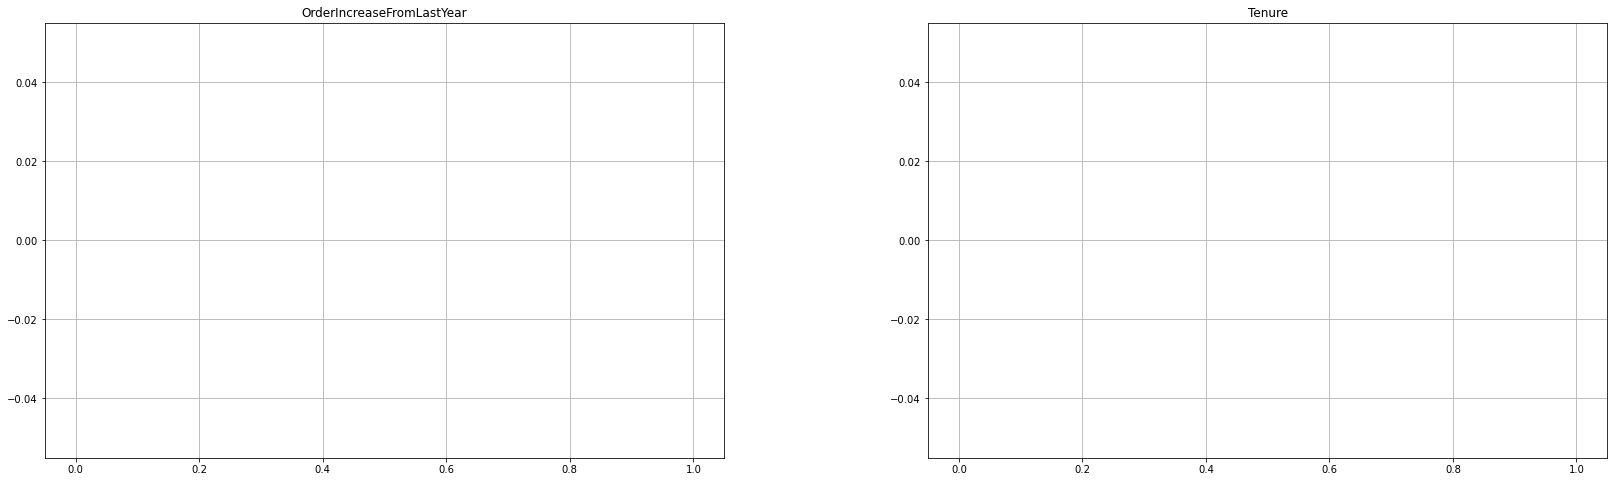

In [105]:
numericFeatures = ['Tenure', 'OrderIncreaseFromLastYear']
fig, ax = plt.subplots(1,2, figsize=(28, 8))
project[project.Churn == "0"][numericFeatures].hist(bins=20, color='blue', alpha=0.5, ax=ax)
project[project.Churn == "1"][numericFeatures].hist(bins=20, color='orange', alpha=0.5, ax=ax)

In [106]:
for column in cleaned_df.columns:
     if cleaned_df[column].dtype == np.number: continue
     # Perform encoding for each non-numeric column
     cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
print(cleaned_df.describe())

             Churn  PreferredLoginDevice     CityTier  PreferredPaymentMode  \
count  1896.000000           1896.000000  1896.000000           1896.000000   
mean      0.500000              1.000000     0.719409              3.436709   
std       0.500132              0.785085     0.936148              1.550284   
min       0.000000              0.000000     0.000000              0.000000   
25%       0.000000              0.000000     0.000000              3.000000   
50%       0.500000              1.000000     0.000000              4.000000   
75%       1.000000              2.000000     2.000000              4.000000   
max       1.000000              2.000000     2.000000              6.000000   

            Gender  DeviceRegistered  PreferedOrderCat  SatisfactionScore  \
count  1896.000000       1896.000000       1896.000000        1896.000000   
mean      0.613397          2.543776          2.454641           2.275316   
std       0.487100          1.015023          1.375262   

C:\Users\ADMIN\anaconda3\Conda21\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021A2F0F1DF0>,
      dtype=object)

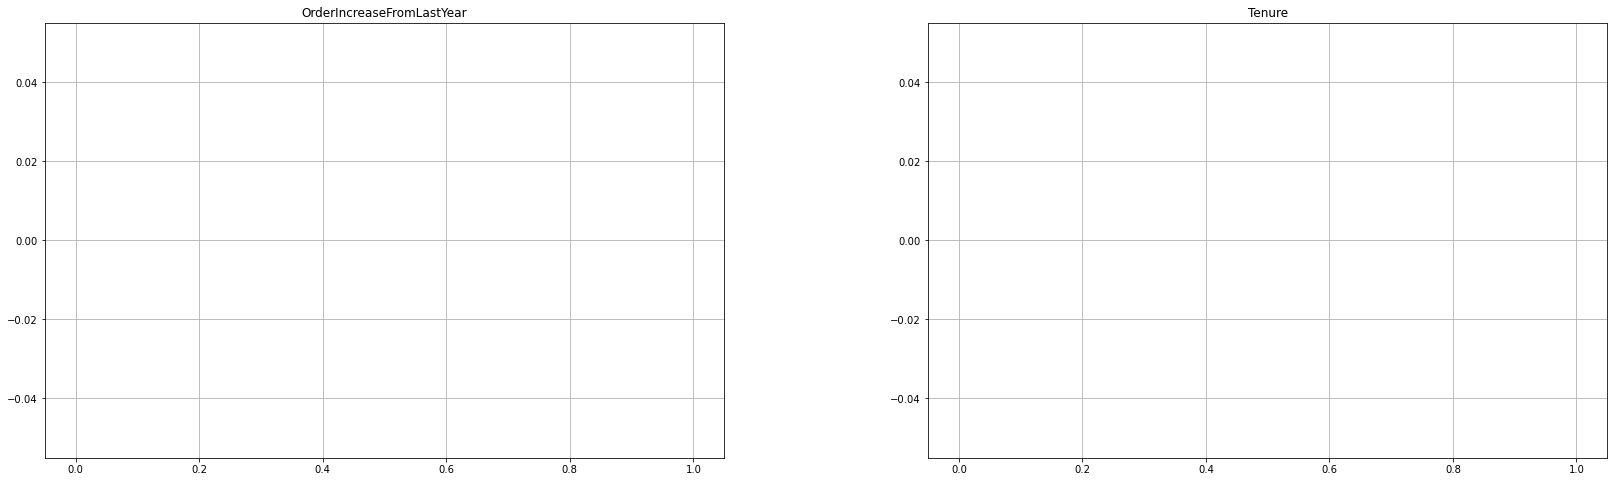

In [107]:
numericFeatures = ['Tenure', 'OrderIncreaseFromLastYear']
fig, ax = plt.subplots(1,2, figsize=(28, 8))
project[project.Churn == "No"][numericFeatures].hist(bins=20, color='blue', alpha=0.5, ax=ax)
project[project.Churn == "Yes"][numericFeatures].hist(bins=20, color='orange', alpha=0.5, ax=ax)

In [108]:
#Convert the non-numeric columns to numeric
for column in cleaned_df.columns:
  if cleaned_df[column].dtype == np.number:
    continue
  cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])

In [109]:
cleaned_df.dtypes

Churn                   int64
PreferredLoginDevice    int64
CityTier                int64
PreferredPaymentMode    int64
Gender                  int64
DeviceRegistered        int64
PreferedOrderCat        int64
SatisfactionScore       int64
MaritalStatus           int64
NumberOfAddress         int64
Complain                int64
dtype: object

In [110]:
x = cleaned_df.drop('Churn', axis=1)
y = cleaned_df['Churn']
x = StandardScaler().fit_transform(x)

In [111]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42) # 80%  training dan 20% testing

In [112]:
from sklearn.model_selection import train_test_split
# Prediksi dan target
X = cleaned_df.drop('Churn', axis = 1)
y = cleaned_df['Churn']
# Membagi data train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Print data
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', x_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (1327, 10) , sedangkan Jumlah baris dan kolom dari y_train adalah: (1327,)
Prosentase Churn di data Training adalah:
1    0.50113
0    0.49887
Name: Churn, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (569, 10) , sedangkan Jumlah baris dan kolom dari y_test adalah: (569,)
Prosentase Churn di data Testing adalah:
0    0.502636
1    0.497364
Name: Churn, dtype: float64


In [102]:
cleaned_df.isna().sum()

Churn                     0
Tenure                  157
PreferredLoginDevice      0
CityTier                  0
PreferredPaymentMode      0
Gender                    0
DeviceRegistered          0
PreferedOrderCat          0
SatisfactionScore         0
MaritalStatus             0
NumberOfAddress           0
Complain                  0
dtype: int64

In [114]:
#Membuat prediksi dengan algoritma Regresi Logistik
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression().fit(x_train,y_train)
print('Model Logistic Regression yang terbentuk adalah: \n',log_model)

Model Logistic Regression yang terbentuk adalah: 
 LogisticRegression()


In [115]:
from sklearn.metrics import classification_report
# Predict
y_train_pred = log_model.predict(x_train)
# Print classification report
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       662
           1       0.79      0.75      0.77       665

    accuracy                           0.77      1327
   macro avg       0.77      0.77      0.77      1327
weighted avg       0.77      0.77      0.77      1327



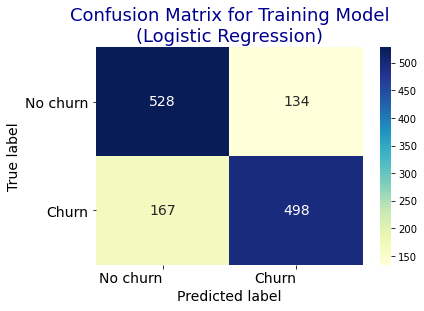

In [116]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [117]:
from sklearn.metrics import classification_report
# Predict
y_test_pred = log_model.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       286
           1       0.77      0.75      0.76       283

    accuracy                           0.76       569
   macro avg       0.76      0.76      0.76       569
weighted avg       0.76      0.76      0.76       569



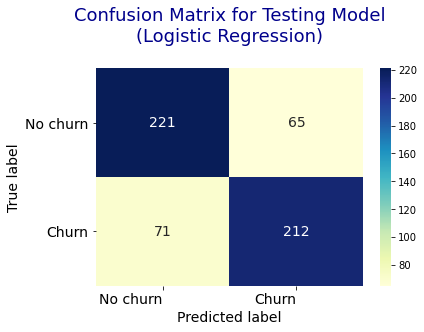

In [118]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [119]:
#Metode Random Forest 
from sklearn.ensemble import RandomForestClassifier
#Train the model
rdf_model = RandomForestClassifier().fit(x_train, y_train)
print(rdf_model)

RandomForestClassifier()


In [120]:
from sklearn.metrics import classification_report
y_train_pred = rdf_model.predict(x_train)
print('Classification Report Training Model (Random Forest) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Random Forest) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       662
           1       1.00      1.00      1.00       665

    accuracy                           1.00      1327
   macro avg       1.00      1.00      1.00      1327
weighted avg       1.00      1.00      1.00      1327



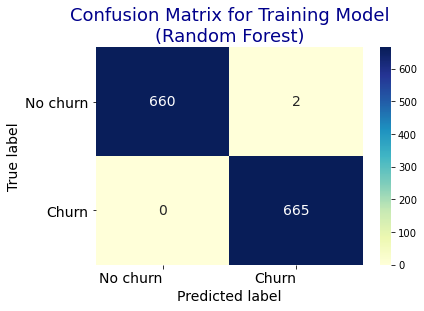

In [121]:

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [122]:
from sklearn.metrics import classification_report
# Predict
y_test_pred = rdf_model .predict(x_test)
# Print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       286
           1       0.84      0.84      0.84       283

    accuracy                           0.84       569
   macro avg       0.84      0.84      0.84       569
weighted avg       0.84      0.84      0.84       569



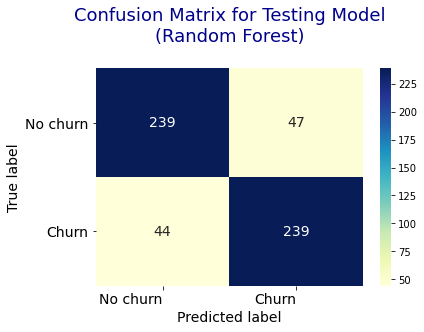

In [123]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [124]:
#Metode Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
#Train the model
gbt_model = GradientBoostingClassifier().fit(x_train, y_train)
print(gbt_model)

GradientBoostingClassifier()


In [125]:
from sklearn.metrics import classification_report
# Predict
y_train_pred = gbt_model.predict(x_train)
# Print classification report
print('Classification Report Training Model (Gradient Boosting):')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       662
           1       0.89      0.85      0.87       665

    accuracy                           0.87      1327
   macro avg       0.87      0.87      0.87      1327
weighted avg       0.87      0.87      0.87      1327



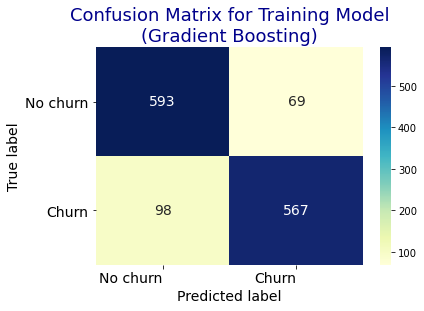

In [126]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [127]:
from sklearn.metrics import classification_report
# Predict
y_test_pred = gbt_model.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       286
           1       0.84      0.79      0.81       283

    accuracy                           0.82       569
   macro avg       0.82      0.82      0.82       569
weighted avg       0.82      0.82      0.82       569



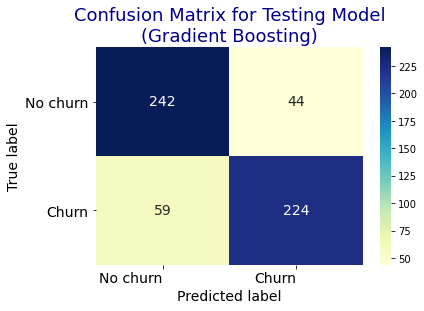

In [128]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [130]:
print(log_model)
pickle.dump(log_model, open('best_model_churn.pkl', 'wb'))

LogisticRegression()


In [ ]:
Berdasarkan pemodelan yang dilakukan dengan regresi logistik, random forest dan Extreme gradient boost maka dapat disiumpulkan untuk 
memprediksi churn dari pelanggan dengan  menggunakan dataset model terbaiknya adalah menggunakan algoritma Logistic Regression.